In [1]:
# Import Libraries

In [2]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
from skimage.transform import rescale
import os

In [3]:
# -------------------------------
# PLACE TO CHANGE
# -------------------------------
image_path = "/data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Input/GSE250346/IPFTMA5/morphology_focus/morphology_focus_0000.ome.tif"
output_path = "/data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/Xenium/GSE250346/01.Subset/DAPI/morphology_with_grid.png"

# Optional export settings
dpi = 50                # Reduce to decrease file size (e.g., 100–150)
figsize = (20, 20)       # Size in inches (e.g., (8, 8) or (12, 12))
grid_step = 1000          # Grid every X original pixels

Image dtype: uint16
Min intensity: 0 Max intensity: 8796
Contrast stretch range: 0.0 2807.0


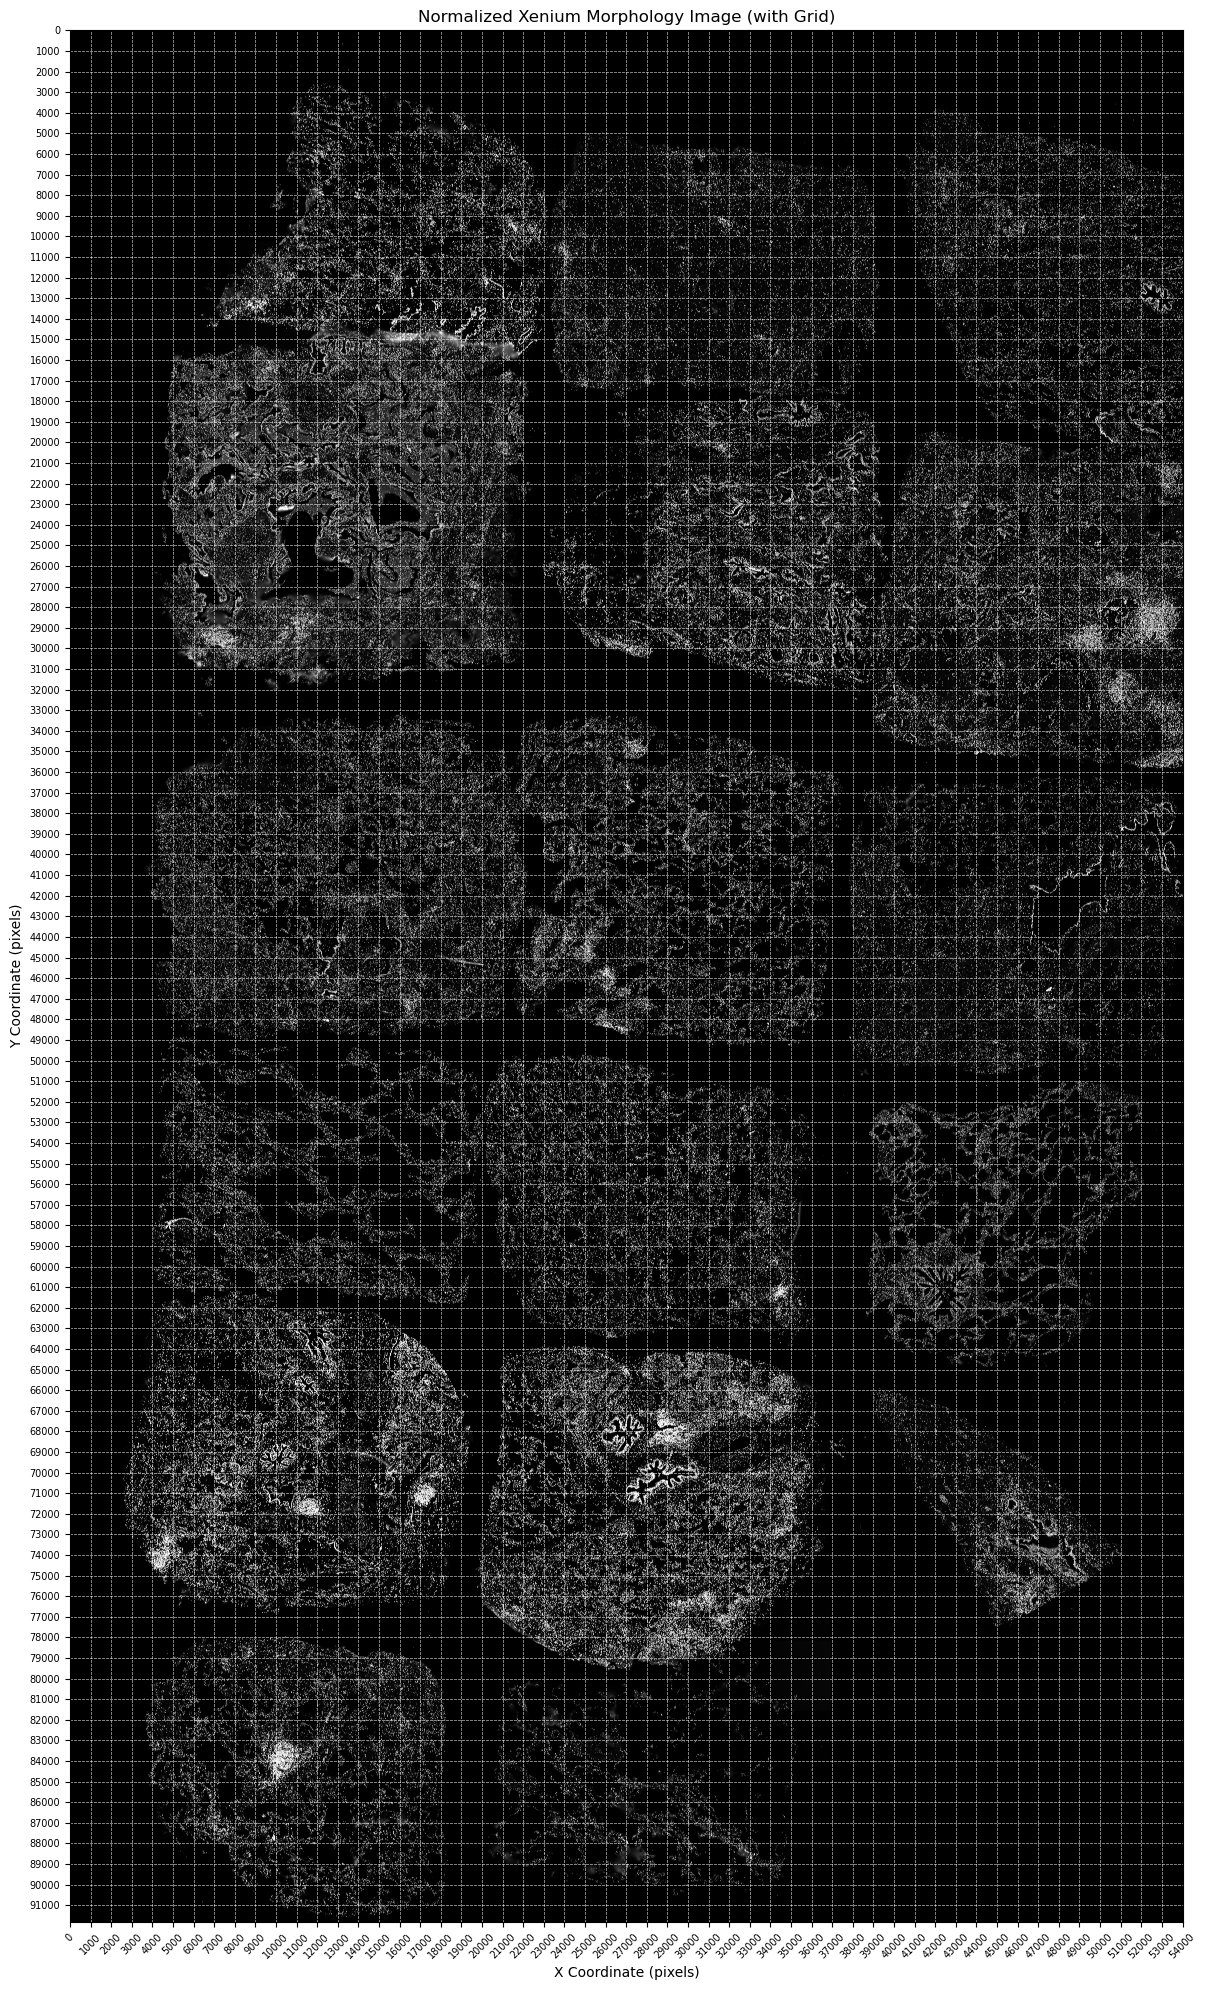

In [4]:
# -------------------------------
# Load Image and Normalize Contrast
# -------------------------------
tif = tifffile.TiffFile(image_path)
page = tif.pages[0]
img = page.asarray()

print("Image dtype:", img.dtype)
print("Min intensity:", img.min(), "Max intensity:", img.max())

# Contrast stretching between 1st and 99th percentiles
p1, p99 = np.percentile(img, (1, 99))
print("Contrast stretch range:", p1, p99)

img_clipped = np.clip(img, p1, p99)
img_norm = ((img_clipped - p1) / (p99 - p1) * 255).astype(np.uint8)

# -------------------------------
# Plot with Grid Overlay
# -------------------------------
fig = plt.figure(figsize=figsize)
plt.imshow(img_norm, cmap="gray")

plt.grid(color='white', linestyle='--', linewidth=0.5, alpha=0.5, antialiased=False)
plt.xlabel("X Coordinate (pixels)", fontsize=10)
plt.ylabel("Y Coordinate (pixels)", fontsize=10)
plt.title("Normalized Xenium Morphology Image (with Grid)", fontsize=12)

# Add grid ticks
x_ticks = np.arange(0, img.shape[1], grid_step)
y_ticks = np.arange(0, img.shape[0], grid_step)
plt.xticks(x_ticks, fontsize=7, rotation=45)
plt.yticks(y_ticks, fontsize=7)
plt.axis("on")

plt.tight_layout()

# --- Show first ---
plt.show()

In [5]:
# --- Save after inspection (Optional) ---
fig.savefig(output_path, dpi=dpi, bbox_inches='tight')
plt.close()
print(f" Saved grid overlay image to: {os.path.abspath(output_path)}")


 Saved grid overlay image to: /data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/Xenium/GSE250346/01.Subset/DAPI/morphology_with_grid.png


In [6]:
# -------------------------------
# Define crop region (pixels)
# -------------------------------

# -------------------------------
# PLACE TO CHANGE
# -------------------------------
# Example: Crop from x: 15000–25000 and y: 10000–20000
x_start, x_end = 37500, 54500
y_start, y_end = 35900, 51000
output_crop_path = "/data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/Xenium/GSE250346/01.Subset/DAPI/Tissue2.png"
resize_factor = 0.1  # Set to 1.0 to keep original resolution

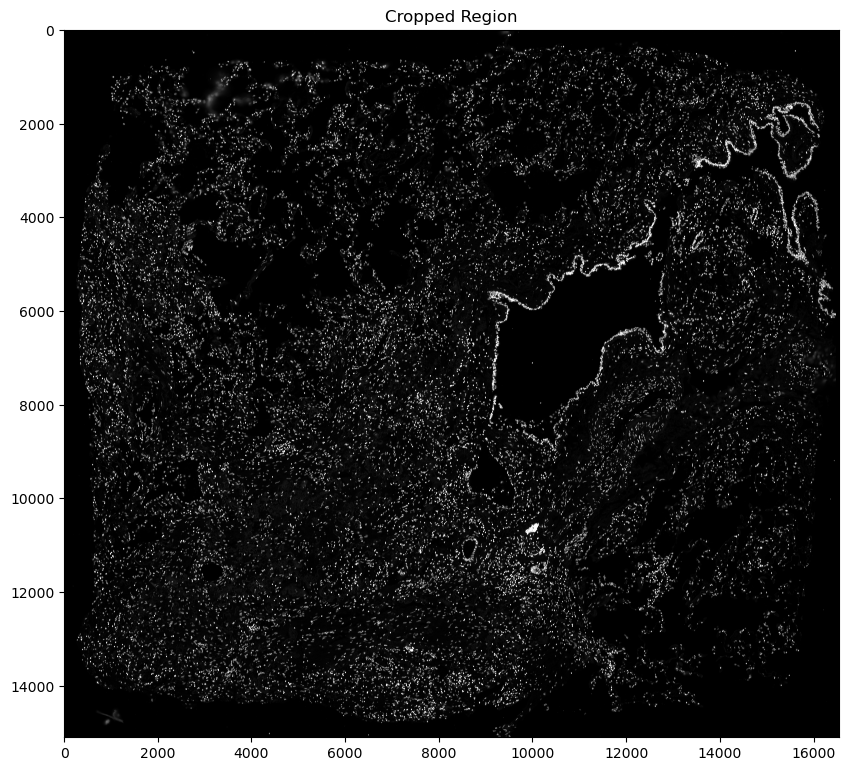

In [7]:
img_crop = img_norm[y_start:y_end, x_start:x_end]
plt.figure(figsize=(10, 10))
plt.imshow(img_crop, cmap='gray')
plt.title("Cropped Region")
plt.axis("on")
plt.show()

In [8]:
# -------------------------------
# Resize (optional) and Save
# -------------------------------
if resize_factor != 1.0:
    img_crop_resized = rescale(
        img_crop,
        resize_factor,
        preserve_range=True,
        anti_aliasing=True
    ).astype(np.uint8)
    plt.imsave(output_crop_path, img_crop_resized, cmap='gray')
    print(f"Cropped + resized image saved to: {output_crop_path} (factor={resize_factor})")
else:
    plt.imsave(output_crop_path, img_crop, cmap='gray')
    print(f"Cropped image saved to: {output_crop_path}")


Cropped + resized image saved to: /data/salomonis2/LabFiles/Shunya_Asanuma/Spatial/LungChat/Output/Xenium/GSE250346/01.Subset/DAPI/Tissue2.png (factor=0.1)
